     sawbs           wtpercep        shpercep          hiq        
 Min.   :-47.74   Min.   :1.544   Min.   :1.816   Min.   :-1.981  
 1st Qu.: 30.14   1st Qu.:2.815   1st Qu.:3.469   1st Qu.: 9.829  
 Median : 57.63   Median :3.172   Median :4.196   Median :17.203  
 Mean   : 57.60   Mean   :3.200   Mean   :4.200   Mean   :16.800  
 3rd Qu.: 88.58   3rd Qu.:3.595   3rd Qu.:4.862   3rd Qu.:21.920  
 Max.   :159.66   Max.   :4.688   Max.   :7.084   Max.   :36.246  
    edicomp            rses            bdi              bmi       
 Min.   :-12.67   Min.   :11.20   Min.   :-6.640   Min.   :13.88  
 1st Qu.: 12.75   1st Qu.:30.93   1st Qu.: 6.119   1st Qu.:19.17  
 Median : 23.38   Median :36.62   Median :10.077   Median :21.85  
 Mean   : 22.50   Mean   :36.00   Mean   :10.500   Mean   :21.70  
 3rd Qu.: 33.68   3rd Qu.:40.82   3rd Qu.:15.186   3rd Qu.:24.20  
 Max.   : 67.71   Max.   :54.97   Max.   :32.366   Max.   :28.13  
      ses             socdesir     
 Min.   :-0.7962   Min.   

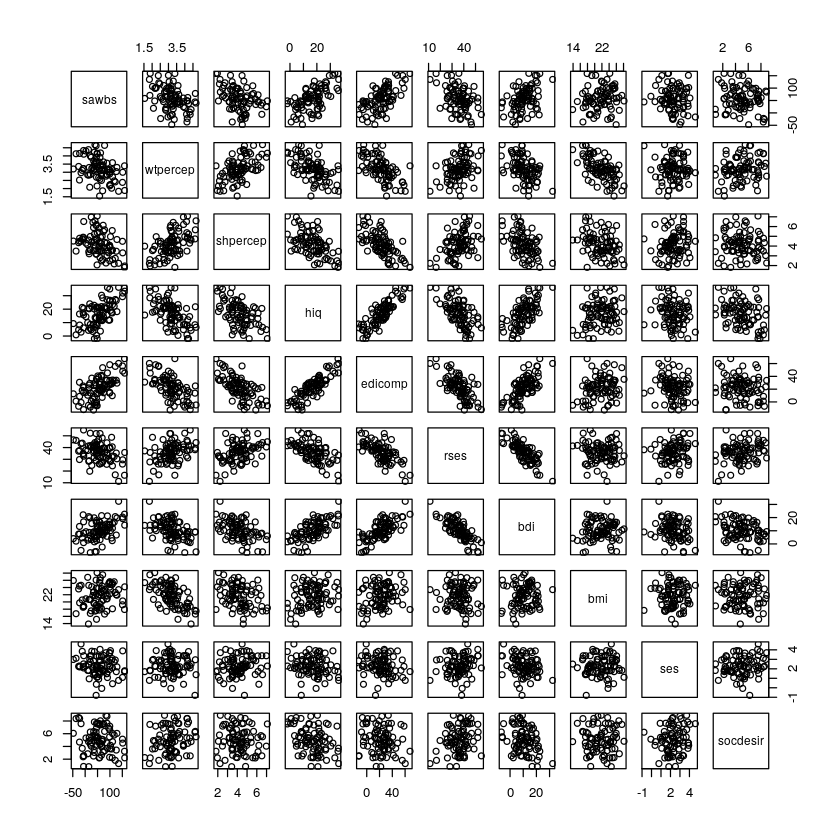

In [28]:
library(foreign)
d <- as.data.frame(read.spss("./Geller.sav"))
summary(d)
pairs(d)

In [29]:
model.c <- lm(hiq ~ rses + sawbs, data=d)
summary(model.c)
sse.c <- sum(residuals(model.c) ^ 2)


Call:
lm(formula = hiq ~ rses + sawbs, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3039  -4.6371   0.2091   4.4005  15.2705 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.29943    3.74596   7.822 1.69e-11 ***
rses        -0.48769    0.08999  -5.419 6.01e-07 ***
sawbs        0.08780    0.01587   5.533 3.76e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.223 on 81 degrees of freedom
Multiple R-squared:  0.5436,	Adjusted R-squared:  0.5323 
F-statistic: 48.24 on 2 and 81 DF,  p-value: 1.599e-14


In [30]:
model.a <- lm(hiq ~ rses + sawbs + rses:sawbs, data=d)
summary(model.a)
sse.a <- sum(residuals(model.a) ^ 2)


Call:
lm(formula = hiq ~ rses + sawbs + rses:sawbs, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2729  -4.4008   0.1306   4.4596  15.1809 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.110904   5.451364   5.707 1.87e-07 ***
rses        -0.536468   0.139465  -3.847 0.000239 ***
sawbs        0.062231   0.057902   1.075 0.285711    
rses:sawbs   0.000734   0.001598   0.459 0.647181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.254 on 80 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5277 
F-statistic: 31.91 on 3 and 80 DF,  p-value: 1.144e-13


In [31]:
anova(model.c, model.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
81,3137.012,NA,NA,NA,NA
80,3128.757,1,8.254593,0.2110638,0.6471809


In [32]:
cor(d$rses, d$sawbs)
cor(d$rses, d$sawbs * d$rses)
cor(d$rses * d$sawbs, d$sawbs)
var(d$rses)
var(d$sawbs)

[1] -0.3782735

[1] -0.04348224

[1] 0.9054992

[1] 67.24

[1] 2162.25

In [34]:
d$rses.0 <- d$rses - mean(d$rses)
d$sawbs.0 <- d$sawbs - mean(d$sawbs)
model.a2 <- lm(hiq ~ rses.0 + sawbs.0 + rses.0:sawbs.0, data=d)
summary(model.a2)
sse.a2 <- sum(residuals(model.a2) ^ 2)


Call:
lm(formula = hiq ~ rses.0 + sawbs.0 + rses.0:sawbs.0, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2729  -4.4008   0.1306   4.4596  15.1809 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.904612   0.719333  23.500  < 2e-16 ***
rses.0         -0.494188   0.091531  -5.399 6.68e-07 ***
sawbs.0         0.088656   0.016055   5.522 4.03e-07 ***
rses.0:sawbs.0  0.000734   0.001598   0.459    0.647    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.254 on 80 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5277 
F-statistic: 31.91 on 3 and 80 DF,  p-value: 1.144e-13


In [36]:
d$wspercep <- (d$wtpercep + d$shpercep) / 2

In [41]:
model.1 <- lm(hiq ~ wspercep, data=d)
model.2 <- lm(rses ~ wspercep, data=d)
model.3 <- lm(hiq ~ wspercep + rses, data=d)

summary(model.1)
summary(model.2)
summary(model.3)

anova(model.1, lm(hiq ~ 1, data=d))
anova(model.2, lm(rses ~ 1, data=d))
anova(model.3, lm(hiq ~ wspercep, data=d))
anova(model.3, lm(hiq ~ rses, data=d))


Call:
lm(formula = hiq ~ wspercep, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1831  -5.2189   0.5918   4.6768  16.6974 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.6937     3.5102  11.878  < 2e-16 ***
wspercep     -6.7280     0.9251  -7.273 1.89e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.138 on 82 degrees of freedom
Multiple R-squared:  0.3921,	Adjusted R-squared:  0.3847 
F-statistic:  52.9 on 1 and 82 DF,  p-value: 1.886e-10



Call:
lm(formula = rses ~ wspercep, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4672  -4.2555   0.2929   4.1053  19.2571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.7249     3.6141   5.458 5.01e-07 ***
wspercep      4.3987     0.9524   4.618 1.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.349 on 82 degrees of freedom
Multiple R-squared:  0.2064,	Adjusted R-squared:  0.1967 
F-statistic: 21.33 on 1 and 82 DF,  p-value: 1.417e-05



Call:
lm(formula = hiq ~ wspercep + rses, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7633  -4.1639   0.4411   4.3885  16.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.6493     3.6454  13.894  < 2e-16 ***
wspercep     -4.7309     0.9236  -5.122 2.01e-06 ***
rses         -0.4540     0.0954  -4.759 8.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.349 on 81 degrees of freedom
Multiple R-squared:  0.525,	Adjusted R-squared:  0.5132 
F-statistic: 44.76 on 2 and 81 DF,  p-value: 8.085e-14


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
82,4178.052,NA,NA,NA,NA
83,6873.230,-1,-2695.178,52.89655,1.886452e-10


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
82,4428.907,NA,NA,NA,NA
83,5580.920,-1,-1152.013,21.3292,1.417495e-05


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
81,3265.080,NA,NA,NA,NA
82,4178.052,-1,-912.972,22.64898,8.371632e-06


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
81,3265.08,NA,NA,NA,NA
82,4322.61,-1,-1057.529,26.23515,2.005259e-06
